# **Tugas Besar 2 Analisis Deret Waktu Kelompok 9 Tentang Kepatuhan Memakai Masker**

Azka Nadhira 1305210068

Latifa Firdausi 1305210073

Felicia Dina Widyasari 1305213030

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
# Import Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pmdarima as pm
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import kstest
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Membaca Data
df = pd.read_excel("9. Data JP Patuh Pakai Masker.xlsx")
df

,Hari,Kepatuhan memakai masker fix
0,1,7824.980658
1,2,8357.827200
2,3,6458.500585
3,4,9404.432787
4,5,9518.411976
...,...,...
1015,1016,19940.919700
1016,1017,17792.143555
1017,1018,18652.798752
1018,1019,20918.055900


In [ ]:
# Mengetahui Tipe Data
df.dtypes

Hari                              int64
Kepatuhan memakai masker fix    float64
dtype: object

# Plot Data

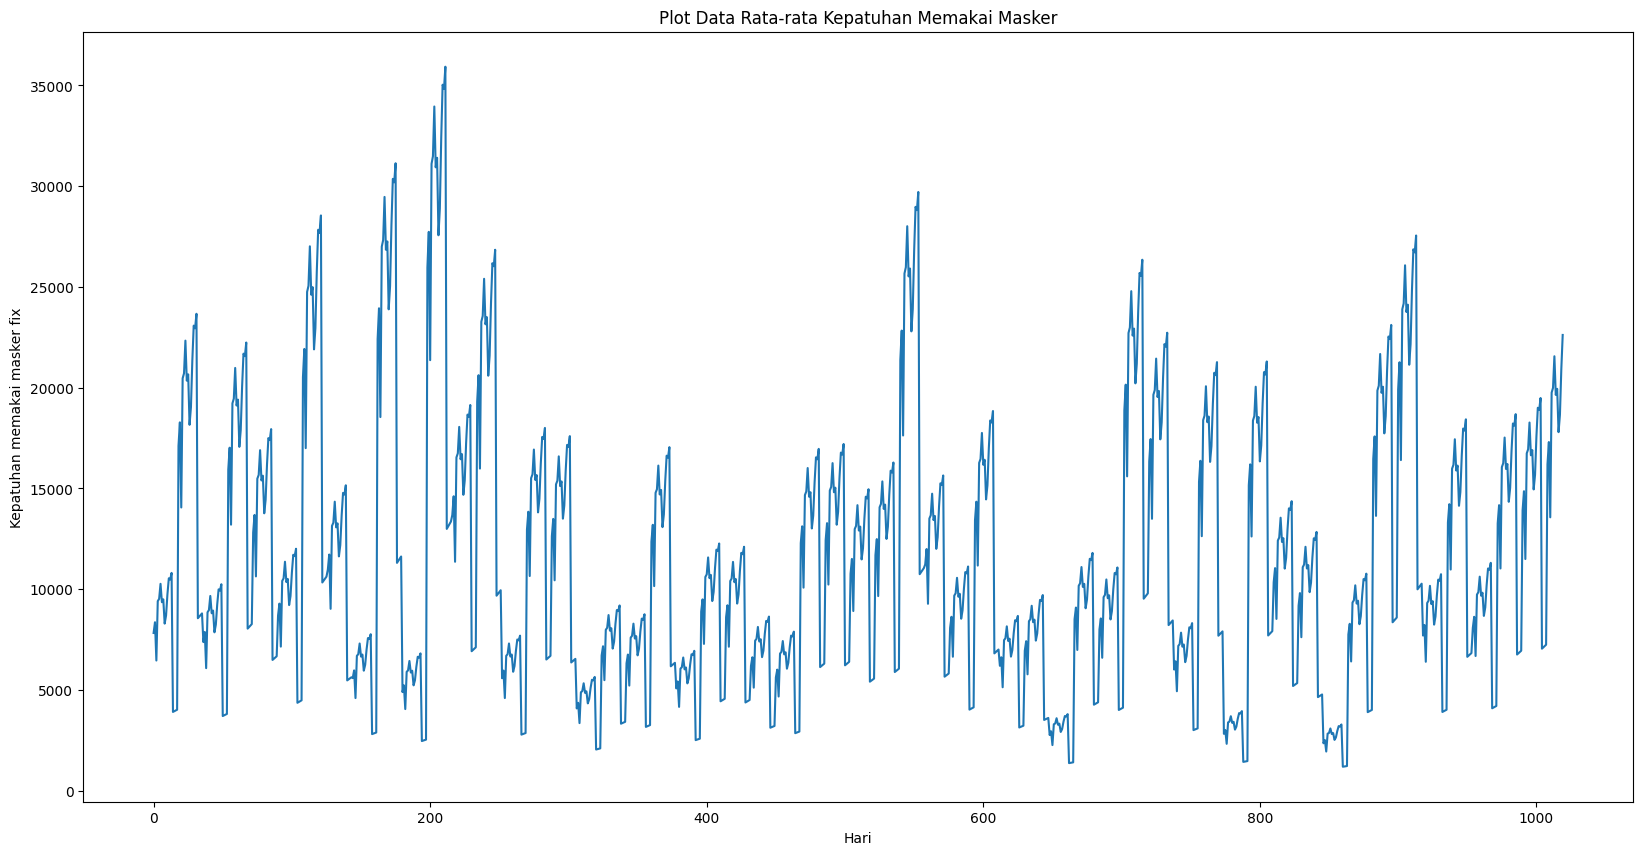

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df['Kepatuhan memakai masker fix'])
plt.title('Plot Data Rata-rata Kepatuhan Memakai Masker')
plt.xlabel('Hari')
plt.ylabel('Kepatuhan memakai masker fix')
plt.show()

Berdasarkan plot di atas, terlihat bahwa pergerakan data tidak mengikuti pola stasioner, untuk mendukung perkiraan ini, dilakukan uji Box-Cox dan uji ADF.

# Periksa Kestasioneran Data Terhadap Variansi, Menggunakan Box-Cox


ADF Statistics:
      Transformed Data = -5.529203776104201
      Original Data = -5.151911449913824
P-value:
      Transformed Data = 1.803547176452825e-06
      Original Data = 1.1013243523333099e-05



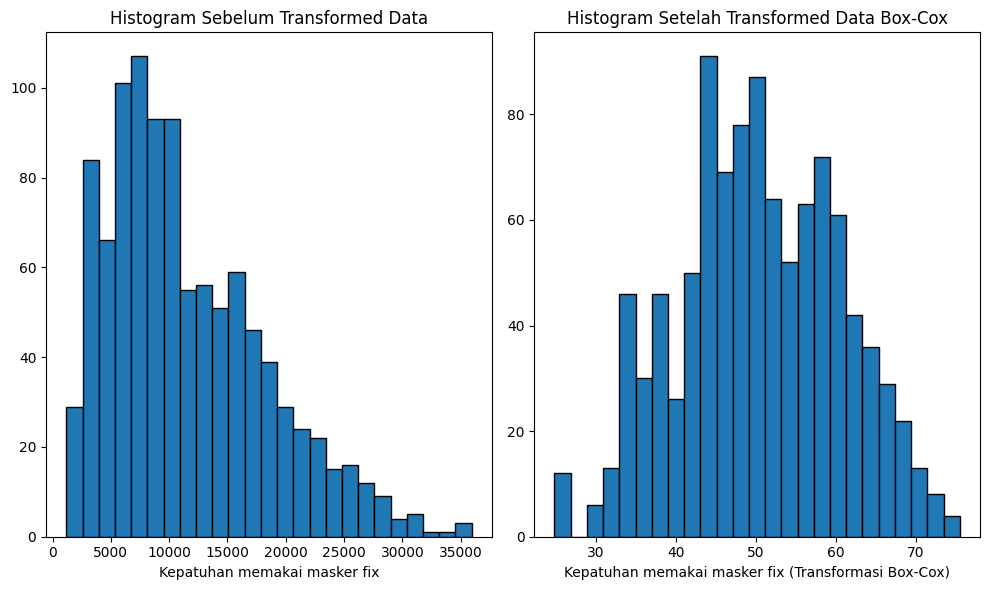

Data stasioner setelah transformasi Box-Cox


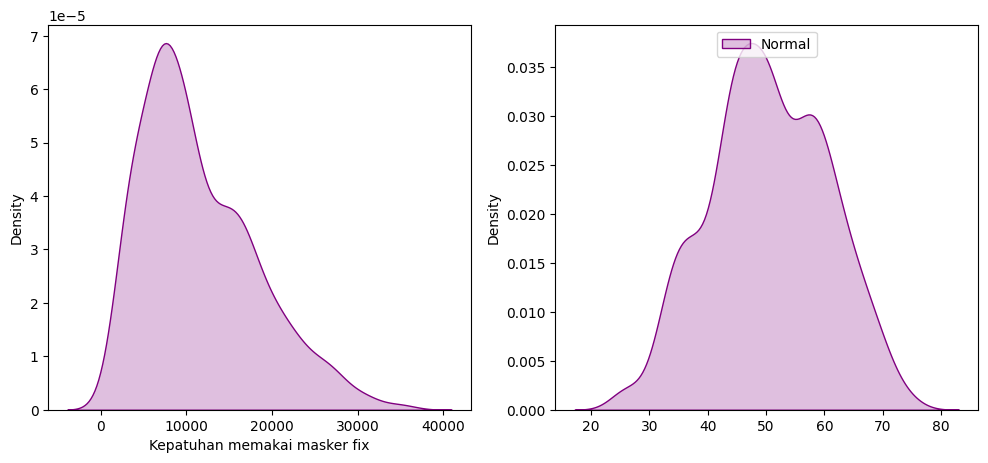

In [ ]:
# Melakukan transformasi Box-Cox pada kolom 'Kepatuhan memakai masker fix'
transformed_data, lambda_value = stats.boxcox(df['Kepatuhan memakai masker fix'])

# Melakukan uji Augmented Dickey-Fuller pada data yang sudah di-transformasi dan data asli
adf_result_transformed = adfuller(transformed_data)
adf_result_original = adfuller(df['Kepatuhan memakai masker fix'])

# Menampilkan hasil uji Augmented Dickey-Fuller
print(f"""
ADF Statistics:
      Transformed Data = {adf_result_transformed[0]}
      Original Data = {adf_result_original[0]}
P-value:
      Transformed Data = {adf_result_transformed[1]}
      Original Data = {adf_result_original[1]}
""")

# Visualisasi histogram sebelum transformasi Box-Cox
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Kepatuhan memakai masker fix'], bins=25, edgecolor='black')
plt.title('Histogram Sebelum Transformed Data')
plt.xlabel('Kepatuhan memakai masker fix')

# Visualisasi histogram setelah transformasi Box-Cox
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=25, edgecolor='black')
plt.title('Histogram Setelah Transformed Data Box-Cox')
plt.xlabel('Kepatuhan memakai masker fix (Transformasi Box-Cox)')

plt.tight_layout()
plt.show()

# Menyatakan apakah data stasioner setelah transformasi Box-Cox atau tidak
if adf_result_transformed[1] <= 0.05:
    print("Data stasioner setelah transformasi Box-Cox")
else:
    print("Data tidak stasioner setelah transformasi Box-Cox")

# Visualisasi distribusi data asli dan data yang sudah ditransformasi
fig, ax = plt.subplots(1, 2)

sns.distplot(df['Kepatuhan memakai masker fix'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 1},
            label = "Non-Normal", color ="purple", ax = ax[0])

sns.distplot(transformed_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 1},
            label = "Normal", color ="purple", ax = ax[1])

plt.legend(loc = "upper center")

fig.set_figheight(5)
fig.set_figwidth(12)

Histogram ini menunjukkan distribusi kepatuhan memakai masker sebelum dan sesudah transformasi Box-Cox. Data asli (sebelum transformasi) tampak condong ke kiri sedangkan data yang diubah (setelah transformasi Box-Cox) tampak lebih simetris, dengan titik-titik data lebih merata di sekitar pusat skala. Dalam kasus ini, P-value untuk data yang ditransformasikan dan data asli kurang dari 0.05 yang menunjukkan bahwa kita dapat menolak hipotesis nol. Sedangkan P-value untuk data yang ditransformasikan sedikit lebih kecil dibandingkan P-value untuk data asli, yang menunjukkan bahwa transformasi Box-Cox membuat deret waktu lebih stasioner. Grafik Data stasioner setelah transformasi Box-Cox terlihat membuat kumpulan data menjadi lebih simetris.

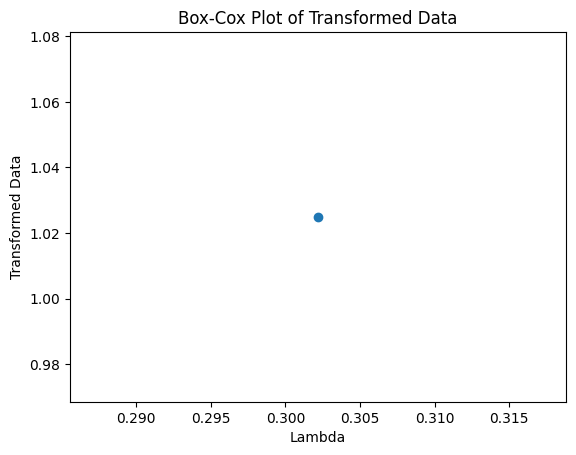

Nilai lambda yang digunakan untuk transformasi: 0.30219423493780273


In [ ]:
# Menampilkan Box-Cox Plot dengan nilai Lambda terhadap Transformed Data
plt.plot(lambda_value, stats.boxcox_normmax(transformed_data), 'o')
plt.xlabel("Lambda")
plt.ylabel("Transformed Data")
plt.title("Box-Cox Plot of Transformed Data")
plt.show()

# Menampilkan nilai Lambda yang digunakan untuk transformasi
print(f"Nilai lambda yang digunakan untuk transformasi: {lambda_value}")

Plot menunjukkan hubungan antara nilai lambda yang digunakan untuk transformasi Box-Cox. Tampak ada puncak titik berwarna biru di sekitar lambda 0.302 yang menunjukkan bahwa nilai ini memaksimalkan transformasi data. Data tidak stasioner terhadap variansi sehingga dilakukan transformasi lambda 0.302.

# Periksa Kestasioneran Data Terhadap Mean Menggunakan Uji ADF

In [ ]:
# Periksa kestasioneran data menggunakan Uji ADF
result_adf = adfuller(df['Kepatuhan memakai masker fix'])
adf_statistic, p_value, n_lags, critical_values = result_adf[0], result_adf[1], result_adf[2], result_adf[4]

print(f'ADF Statistic          : {adf_statistic}')
print(f'p-value                : {p_value}')
print(f'Optimal Number of Lags : {n_lags}')
print('Critical Values        :')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic          : -5.151911449913824
p-value                : 1.1013243523333099e-05
Optimal Number of Lags : 22
Critical Values        :
   1%: -3.4369259442540416
   5%: -2.8644432969122833
   10%: -2.5683158550174094


Berdasarkan hasil pengujian ADF, diperoleh bahwa p-value lebih kecil dari nilai kritis sehingga tolak Ho. Artinya data yang digunakan sudah staasioner. Nilai statistik uji ADF sangat negatif sebesar -5.15 yang menunjukkan bahwa ada bukti yang kuat bahwa deret waktu bersifat stasioner. Kemudian p-value yang didapatkan sangat kecil sebesar  1.1013243523333099e-05 yang menunjukkan bahwa menolak hipotesis nol, menandakan bahwa data cenderung stasioner. Analisis ini menggunakan 22 lags yang menunjukkan jumlah yang optimal yang digunakan dalam model ADF. Perbandingan nilai statistik uji dengan nilai-nilai kritis pada tingkat signifikansi 1%, 5%, dan 10% juga memvalidasi temuan ini, dengan nilai statistik ADF jauh di bawah nilai-nilai kritis yang disetujui.

# Plot ACF dan PACF

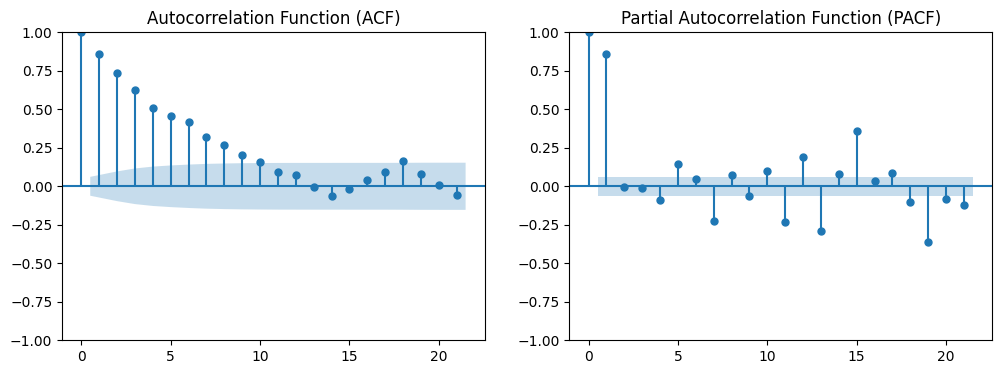

In [ ]:
# Plot ACF dan PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['Kepatuhan memakai masker fix'], ax=ax1, lags=21)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Kepatuhan memakai masker fix'], ax=ax2, lags=21)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

ACF tidak turun ke nol dan peluruhannya lambat ini menunjukkan tidak stasioner. Sedangkan PACF turun eksponensial bergantian tanda menuju 0 setelah lag 1. Plot PACF mengalami cut-off pada lag 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21.

In [ ]:
# Calculate the first-order difference
transformed_data = pd.DataFrame(transformed_data, columns=["Kepatuhan memakai masker fix"])
transformed_data['Perubahan Kepatuhan Memakai Masker'] = transformed_data['Kepatuhan memakai masker fix'].diff().abs()
# Drop the NaN value created by differencing
transformed_data = transformed_data.dropna()
transformed_data = transformed_data['Perubahan Kepatuhan Memakai Masker']
transformed_data

1       0.999203
2       3.799372
3       5.639370
4       0.191595
5       1.215107
          ...   
1015    0.300425
1016    2.232889
1017    0.915800
1018    2.277111
1019    1.596077
Name: Perubahan Kepatuhan Memakai Masker, Length: 1019, dtype: float64

Melakukan difference orde pertama dari deret waktu dan membuatnya menjadi DataFrame baru. Differencing orde pertama mengukur perbedaan antara setiap elemen pada deret waktu dengan elemen sebelumnya. Langkah ini dilakukan untuk membuat deret waktu lebih stasioner.

In [ ]:
def interpretasi_adf_results(adf_stat, p_value, crit_value, alpha=0.05):
    if p_value < alpha:
        if adf_stat < crit_value:
            return "Data cenderung stasioner. Nilai Statistik ADF sangat rendah (stasioner)"
        else:
            return "Data cenderung stasioner. Nilai Statistik ADF menunjukkan tanda-tanda stasioneritas di atas nilai signifikansi 1%"
    else:
        return "Data cenderung tidak stasioner"

result = adfuller(transformed_data)

adf_statistic, p_value, n_lags, critical_values = result[0], result[1], result[2], result[4]

print(f'ADF Statistic          : {adf_statistic}')
print(f'p-value                : {p_value}')
print(f'Optimal Number of Lags : {n_lags}')
print('Critical Values        :')
for key, value in critical_values.items():
    print(f'   {key}: {value}')
print('Analisis Hasil Uji ADF:', interpretasi_adf_results(adf_statistic, p_value, critical_values["1%"]))

ADF Statistic          : -6.080535483827291
p-value                : 1.0949423173094779e-07
Optimal Number of Lags : 21
Critical Values        :
   1%: -3.4369259442540416
   5%: -2.8644432969122833
   10%: -2.5683158550174094
Analisis Hasil Uji ADF: Data cenderung stasioner. Nilai Statistik ADF sangat rendah (stasioner)


Melakukan interpretasi hasil uji Augmented Dickey-Fuller (ADF) terhadap stasioneritas suatu deret waktu. Diperoleh nilai ADF yang lebih kecil sebesar -6.080 dengan nilai p-value sebesar  1.0949423173094779e-07

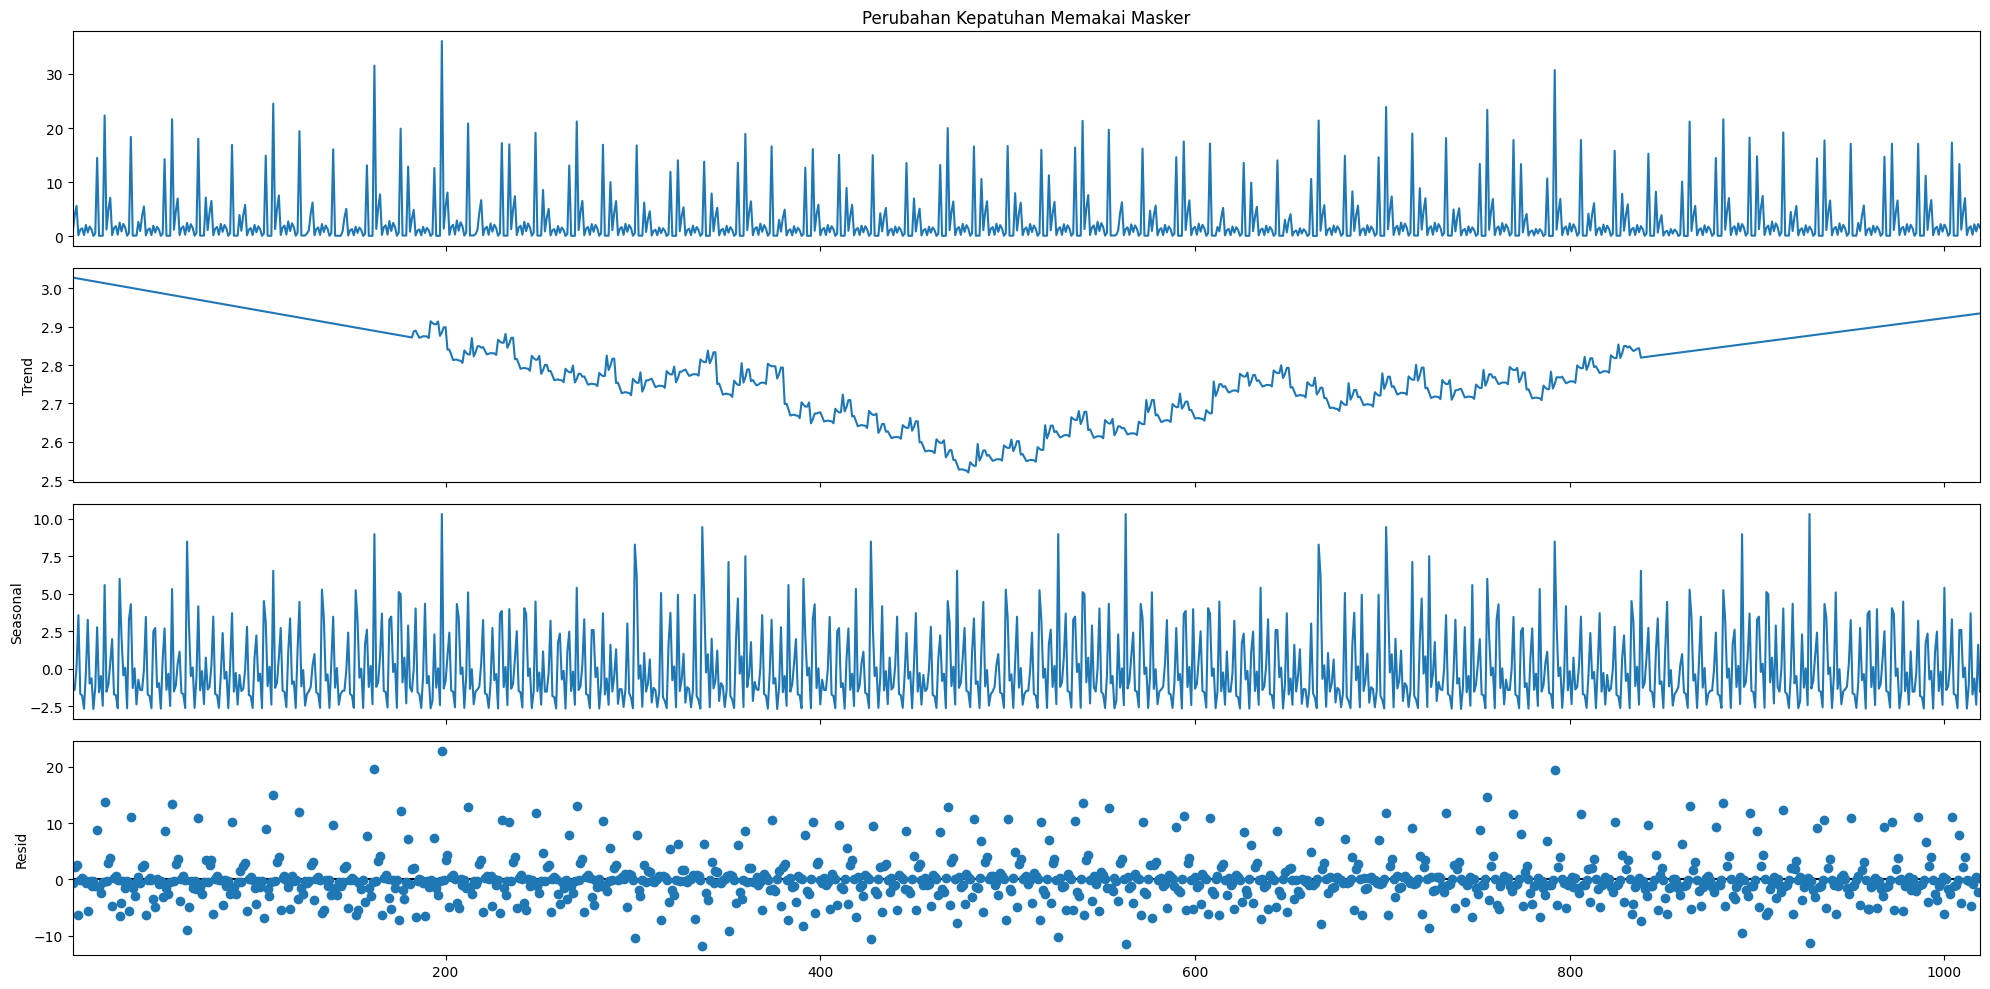

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Menyimpan ukuran gambar default sebelum diubah
ukuran_default = plt.rcParams['figure.figsize']

# Menerapkan dekomposisi musiman menggunakan model aditif
hasil_aditif = seasonal_decompose(transformed_data, model='additive', extrapolate_trend='freq', period=365)

# Memperbaharui ukuran gambar untuk visualisasi yang lebih baik
plt.rcParams.update({'figure.figsize': (20, 10)})

# Plot komponen yang sudah didekomposisi
hasil_aditif.plot().suptitle('', fontsize=15)

# Menampilkan plot
plt.show()

# Reset ukuran gambar ke nilai default
plt.rcParams['figure.figsize'] = ukuran_default

Uji stasioneritas ADF setelah diferensiasi dan transformasi. Hal ini berarti deret waktu tidak mempunyai akar unit dan stasioner dalam variansi dan mean.

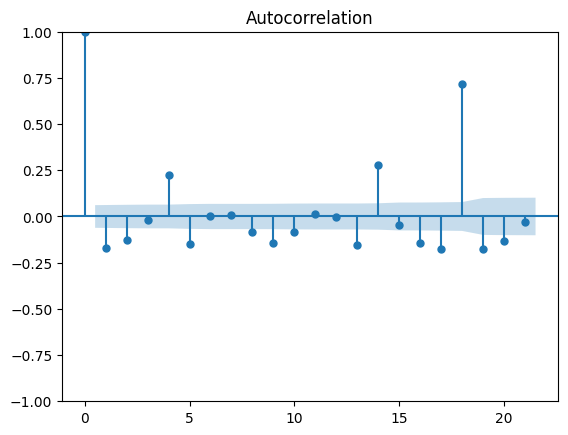

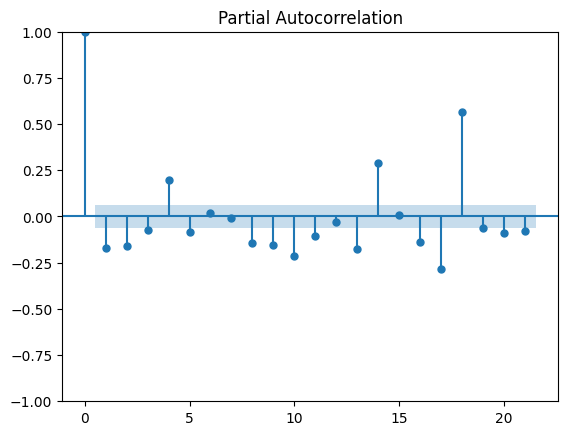

In [ ]:
# Menampilkan plot ACF dan PACF dengan batas kepercayaan 95% hingga lag 21
plot_acf(transformed_data, alpha=0.05, lags=21)
plot_pacf(transformed_data, alpha=0.05, lags=21)

# Menampilkan plot
plt.show()

Plot ACF mengalami cut-off pada lag ke-1, 2, 4, 5, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20 sedangkan plot PACF mengalami cut-off pada lag ke-1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21. Selanjutnya akan dipilih model terbaik berdasarkan nilai AIC dari semua kombinasi kemungkinan model yang dapat dibentuk.

# Identifikasi Model ARMA (p,q)

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Mencari kombinasi (p, q) menggunakan AIC
aic_values = []
for p in range(1, 4):
    for q in range(1, 4):
        model_arma = sm.tsa.ARIMA(df['Kepatuhan memakai masker fix'], order=(p, 0, q))
        results = model_arma.fit()
        aic = results.aic
        aic_values.append((p, q, aic))

# Menampilkan hasil AIC
for p, q, aic in aic_values:
    print(f"ARMA({p}, {q}) - AIC: {aic}")

ARMA(1, 1) - AIC: 19523.414285540646
ARMA(1, 2) - AIC: 19525.217975259322
ARMA(1, 3) - AIC: 19519.521013875616
ARMA(2, 1) - AIC: 19524.917266891644
ARMA(2, 2) - AIC: 19526.255662845168
ARMA(2, 3) - AIC: 19517.004970147533
ARMA(3, 1) - AIC: 19525.874924889184
ARMA(3, 2) - AIC: 19444.55551290376
ARMA(3, 3) - AIC: 19440.964174199522


Model ARMA(3,3) memiliki AIC terkecil, yaitu 19440.96. AIC adalah singkatan dari Akaike Information Criterion. AIC adalah ukuran dari kebaikan fit suatu model. Model dengan AIC terkecil adalah model yang paling baik dalam memodelkan data.

# Identifikasi Model ARIMA (p,d,q)

In [ ]:
# Melakukan fitting model ARIMA otomatis pada kolom 'Kepatuhan memakai masker fix'
model = pm.auto_arima(df['Kepatuhan memakai masker fix'],
                      m=12,
                      seasonal=False,
                      d=None,
                      test='adf',
                      start_p=0, start_q=0,
                      max_p=25, max_q=25,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Menampilkan ringkasan hasil fitting model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22273.133, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19576.943, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21593.701, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19576.222, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=19576.634, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19576.005, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=19575.989, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=20681.523, Time=0.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19576.479, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=19577.969, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=21266.624, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=19578.070, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=19525.227, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] i

Model ARIMA(1,0,0) memiliki score AIC paling kecil diantara model ARIMA lainnya, yakni sebesar 19521.411

# Model Terbaik

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 3, 0, 3

model = ARIMA(df['Kepatuhan memakai masker fix'], order=(p, d, q))
results = model.fit()
print(results.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Kepatuhan memakai masker fix   No. Observations:                 1020
Model:                           ARIMA(3, 0, 3)   Log Likelihood               -9712.482
Date:                          Sat, 13 Jan 2024   AIC                          19440.964
Time:                                  17:29:57   BIC                          19480.385
Sample:                                       0   HQIC                         19455.932
                                         - 1020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    863.484     13.329      0.000    9816.648    1.32e+04
ar.L1          0.1809      0.040      4.525      0.

Dapat disimpulkan bahwa model ARMA(3,3) merupakan model yang sesuai untuk data kepatuhan memakai masker. Hal ini dapat dilihat dari dari model ARMA(3,3) yang memiliki score AIC terendah, yaitu 19440.964 Kemudian didapatkan score Log Likelihood sebesar  -9712.482 dengan score Ljung-Box sebesar 0.04. Dalam banyak kasus, semakin tinggi skor likelihood, semakin baik modelnya cocok dengan data. Sedangkan score Ljung-Box yang mendekati 0.0 menunjukkan bahwa tidak ada korelasi residual yang signifikan pada deret waktu. Dengan kata lain, nilai-nilai residual dari model tidak menunjukkan pola atau korelasi sistematis yang dapat diidentifikasi oleh model. Ini dapat dianggap sebagai indikasi bahwa model ARMA yang digunakan telah berhasil dalam menangkap struktur deret waktu.

# Estimasi Parameter Menggunakan Metode Maximum Likelihood

In [ ]:
# Maximum Likelihood: Uji Signifikansi
hasil_model = model.fit()

# Mendapatkan estimasi parameter dan standar error
estimasi_parameter = hasil_model.params
standar_error_parameter = hasil_model.bse

# Melakukan pengujian hipotesis untuk signifikansi paramter
alpha = 0.01

print("Maximum likelihood: Uji Signifikansi")
parameter_signifikan = []
for parameter, std_err in zip(estimasi_parameter, standar_error_parameter):
    statistik_t = parameter / std_err
    p_value = 2 * (1 - stats.t.cdf(abs(statistik_t), df=hasil_model.df_resid))

    if p_value < alpha:
        parameter_signifikan.append((parameter, p_value))

if parameter_signifikan:
    print("Parameter yang signifikan:")
    for parameter, p_value in parameter_signifikan:
            print(f"Parameter: {parameter:4} signifikan (p-value: {p_value})")
else:
        print("Tidak ada parameter yang signifikan")
print('-' * 40)

Maximum likelihood: Uji Signifikansi
Parameter yang signifikan:
Parameter: 11509.045155387994 signifikan (p-value: 0.0)
Parameter: 0.1809132584578328 signifikan (p-value: 6.053281600859606e-06)
Parameter: -0.29456886145717326 signifikan (p-value: 2.4424906541753444e-15)
Parameter: 0.6808053722194021 signifikan (p-value: 0.0)
Parameter: 0.7162851903646025 signifikan (p-value: 0.0)
Parameter: 1.0165322870533933 signifikan (p-value: 0.0)
Parameter: 0.20553117333964033 signifikan (p-value: 0.000943019722267735)
Parameter: 11328865.381647622 signifikan (p-value: 0.0)
----------------------------------------


Uji signifikansi parameter dengan likelihood sudah signifikan. Hal ini dapat dilihat dari nilai p-value yang ditunjukkan. Nilai p-value yang lebih kecil dari tingkat signifikansi yang ditetapkan (biasanya 0,05) menunjukkan bahwa parameter tersebut signifikan. Berdasarkan hasil analisis di atas, terdapat 8 parameter yang diuji signifikansinya. Semua parameter tersebut memiliki nilai p-value yang lebih kecil dari 0,05 sehingga dapat disimpulkan bahwa semua parameter tersebut signifikan. Oleh karena itu, dapat disimpulkan bahwa semua parameter dalam model tersebut memiliki pengaruh yang signifikan terhadap variabel dependen.

# Uji Kelayakan Model Menggunakan Ljung-Box

In [ ]:
# Anggap ingin menguji 21 lag
jumlah_lag = 21

# Membuat model
order = (1, 0, 0)
model_arma = sm.tsa.ARIMA(df['value'], order=order)
results_arma = model_arma.fit()

# Uji Ljung-Box untuk Autokorelasi
hasil_uji_lb = sm.stats.acorr_ljungbox(results_arma.resid, lags=jumlah_lag)

# Ekstraksi nilai uji statistik dan nilai p
statistik_uji = hasil_uji_lb['lb_stat']
nilai_p = hasil_uji_lb['lb_pvalue']

# Menampilkan Hasil Uji Ljung-Box
print("Hasil Uji Ljung-Box:")
for i in range(jumlah_lag):
    print(f"Lag {i+1}: Statistik Uji = {statistik_uji.iloc[i]:.4f}, nilai p = {nilai_p.iloc[i]:.4f}")

# Kesimpulan dari uji Ljung-Box
tingkat_signifikansi = 0.01
lag_signifikan = sum(nilai_p < tingkat_signifikansi)
print(f"\nJumlah Lag dengan Autokorelasi Signifikan: {lag_signifikan}")
if lag_signifikan == 0:
    print("Residual menunjukkan tidak ada autokorelasi yang signifikan. Model dapat dianggap sebagai white noise.")
else:
    print(f"Residual masih menunjukkan autokorelasi yang signifikan pada {lag_signifikan} lag. Model mungkin perlu penyempurnaan lebih lanjut.")


Hasil Uji Ljung-Box:
Lag 1: Statistik Uji = 0.0001, nilai p = 0.9919
Lag 2: Statistik Uji = 0.1809, nilai p = 0.9135
Lag 3: Statistik Uji = 0.2456, nilai p = 0.9699
Lag 4: Statistik Uji = 0.5241, nilai p = 0.9711
Lag 5: Statistik Uji = 4.5061, nilai p = 0.4791
Lag 6: Statistik Uji = 4.5431, nilai p = 0.6036
Lag 7: Statistik Uji = 4.5448, nilai p = 0.7153
Lag 8: Statistik Uji = 6.3003, nilai p = 0.6136
Lag 9: Statistik Uji = 6.3021, nilai p = 0.7093
Lag 10: Statistik Uji = 7.2603, nilai p = 0.7007
Lag 11: Statistik Uji = 9.5378, nilai p = 0.5724
Lag 12: Statistik Uji = 9.7168, nilai p = 0.6408
Lag 13: Statistik Uji = 11.2178, nilai p = 0.5926
Lag 14: Statistik Uji = 14.4280, nilai p = 0.4183
Lag 15: Statistik Uji = 16.1030, nilai p = 0.3752
Lag 16: Statistik Uji = 16.3531, nilai p = 0.4286
Lag 17: Statistik Uji = 16.8099, nilai p = 0.4673
Lag 18: Statistik Uji = 16.9602, nilai p = 0.5258
Lag 19: Statistik Uji = 17.4537, nilai p = 0.5592
Lag 20: Statistik Uji = 17.9889, nilai p = 0.5881


Uji Ljung-Box digunakan untuk menguji apakah sisaan dari model time series bersifat white noise atau tidak. Sisaan yang bersifat white noise tidak memiliki korelasi serial, artinya nilai sisaan dari suatu pengamatan tidak dipengaruhi oleh nilai sisaan dari pengamatan sebelumnya. Dapat dilihat bahwa semua p-value dari 21 lag lebih besar dari alfa (5%) maka terima Ho. Sehingga dapat disimpulkan bahwa residu atau sisaan dari model ARMA(3,3) mengikuti pola White Noise, artinya model ini layak digunakan.

# Uji Kenormalan Sisaan Menggunakan Kolmogorov-Smirnov

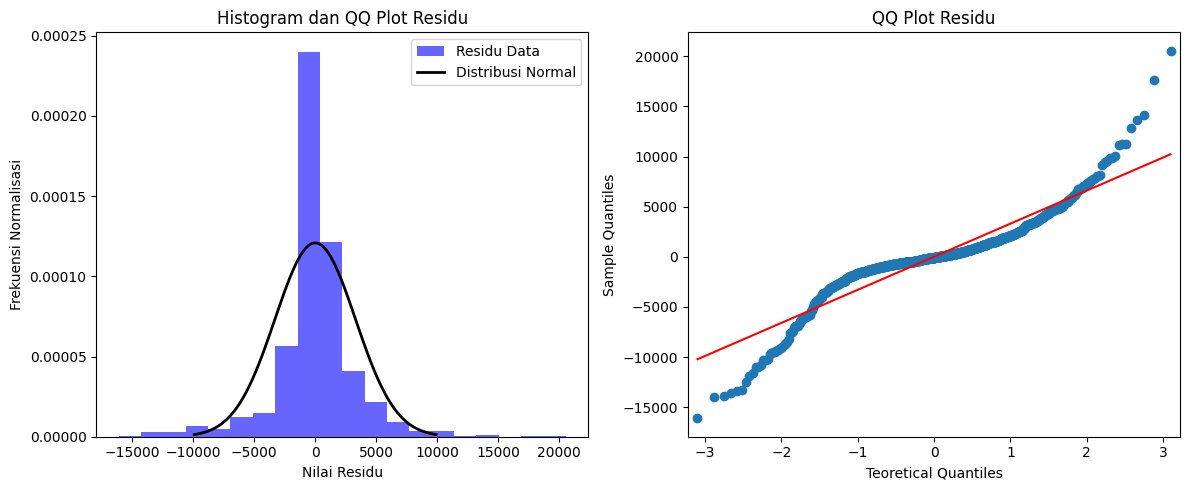


Kolmogorov-Smirnov Statistic : 0.5176470588235295
P-value : 1.4316237283390721e-254

Sisaan tidak terdistribusi normal (menolak hipotesis nol)


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 3, 0, 3

model = ARIMA(df['Kepatuhan memakai masker fix'], order=(p, d, q))
results = model.fit()

# Data residu dari model
residuals = results.resid

# Menghitung statistik Kolmogorov-Smirnov dan p-value dari sisaan model
ks_statistic, ks_p_value = kstest(residuals, 'norm')

# Membuat gambar dengan dua subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Menampilkan histogram dari residu
ax1.hist(residuals, bins=20, density=True, alpha=0.6, color='b', label='Residu Data')

# Menampilkan kurva distribusi normal
mean, std_dev = np.mean(residuals), np.std(residuals)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
pdf = norm.pdf(x, mean, std_dev)
ax1.plot(x, pdf, 'k-', linewidth=2, label='Distribusi Normal')

# Menampilkan QQ plot
sm.qqplot(residuals, line='s', ax=ax2)

# Menambahkan label dan judul untuk kedua subplot
ax1.set_xlabel('Nilai Residu')
ax1.set_ylabel('Frekuensi Normalisasi')
ax1.set_title('Histogram dan QQ Plot Residu')
ax1.legend()

ax2.set_xlabel('Teoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')
ax2.set_title('QQ Plot Residu')

# Menampilkan plot
plt.tight_layout()
plt.show()

print(f'''
Kolmogorov-Smirnov Statistic : {ks_statistic}
P-value : {ks_p_value}
''')
alpha = 0.05
if ks_p_value > alpha:
    print("Sisaan terdistribusi normal (tidak dapat menolak hipotesis nol)")
else:
    print("Sisaan tidak terdistribusi normal (menolak hipotesis nol)")

Uji normalitas menggunakan Kolmogorov-Smirnov adalah metode statistik untuk menentukan sejauh mana sisaan model (residuals) terdistribusi secara normal. Dari histogram di atas dapat dilihat bahwa residual tidak berdistribusi normal dengan p-value sebesar 1.4316237283390721e-254

# Forecasting ARMA (3,3)

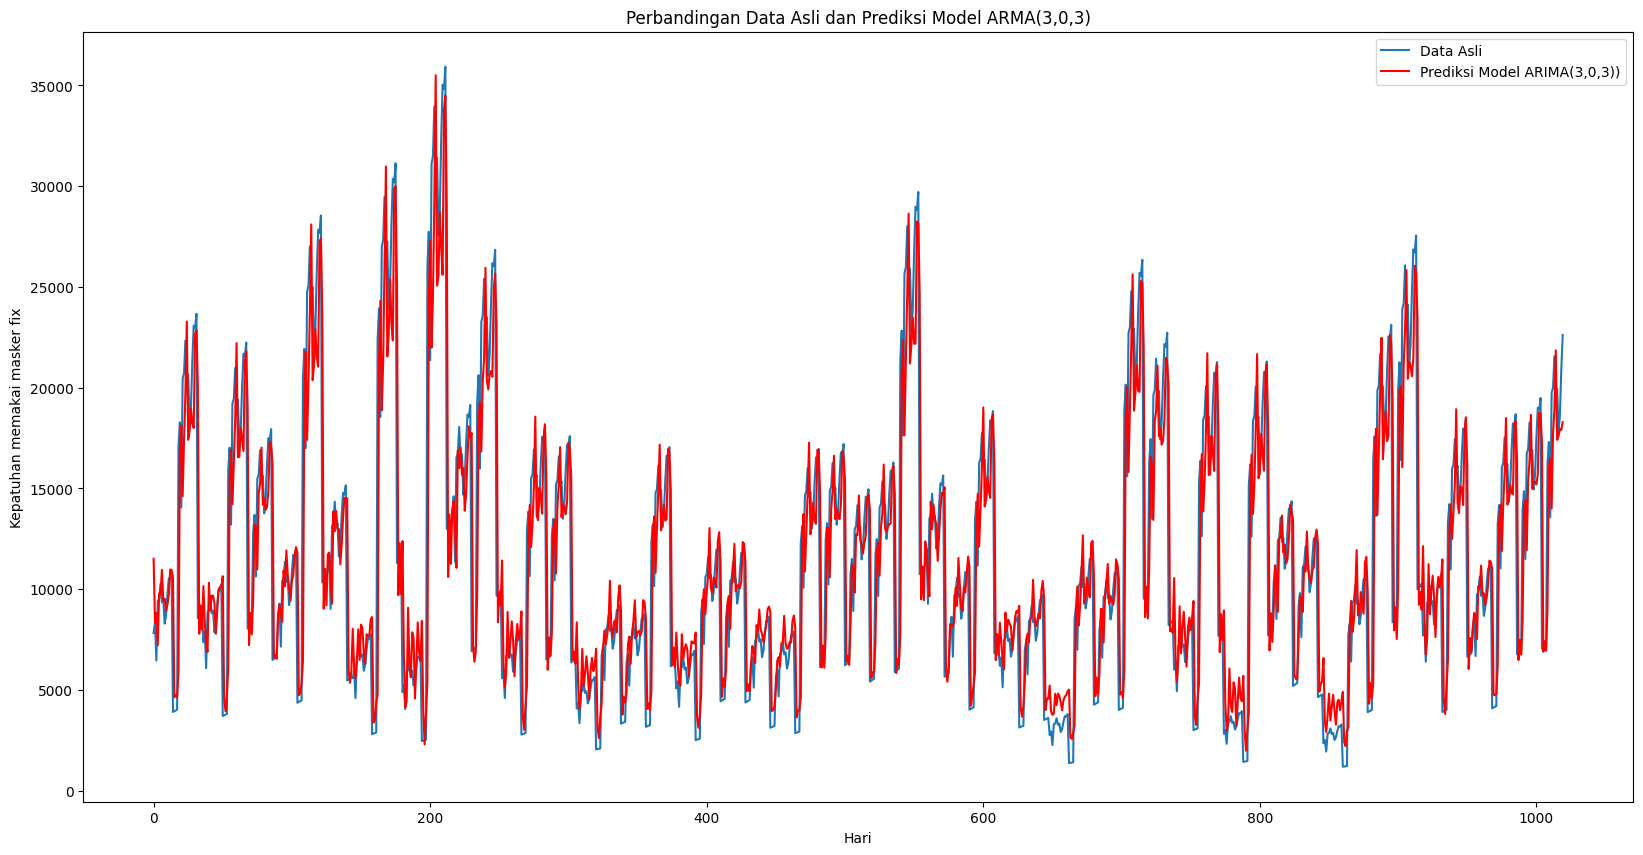

In [ ]:
# Plot hasil prediksi
plt.figure(figsize=(20, 10))
plt.plot(df['Kepatuhan memakai masker fix'], label="Data Asli")
plt.plot(results.fittedvalues, color='red', label="Prediksi Model ARIMA(3,0,3))")
plt.legend()
plt.title("Perbandingan Data Asli dan Prediksi Model ARMA(3,0,3)")
plt.xlabel('Hari')
plt.ylabel('Kepatuhan memakai masker fix')
plt.show()

Pola nilai data hasil prediksi (garis merah) mengikuti pola garis data asli. Pada plot prediksi model, dapat dilihat bahwa model dapat menangkap data dengan cukup baik. Namun, ada beberapa penyimpangan antara prediksi dan data aktual. Secara umum, plot ini menunjukkan bahwa model ARMA(3,3) dapat digunakan untuk memprediksi kepatuhan memakai masker dengan cukup baik.

# Menghitung RMSE

In [ ]:
#Periksa stasioneritas dan terapkan differencing
if not sm.tsa.adfuller(data)[1] < 0.05:
    data = data.diff().dropna()

#Tentukan dan sesuaikan model
order = (3, 0, 3)  # Adjust orders based on data characteristics and diagnostics
model = ARIMA(data, order=order)
model_fit = model.fit()

# Hasilkan predictions
predictions = model_fit.forecast(steps=len(data))

# Menghitung RMSE
mse = mean_squared_error(data, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.920511188806179


Root Mean Squared Error (RMSE) adalah salah satu metrik evaluasi kinerja model regresi yang digunakan untuk mengukur seberapa baik model memprediksi nilai target (variabel dependen) pada dataset pengujian. RMSE adalah bentuk dari Mean Squared Error (MSE) yang diakarkan untuk memberikan interpretasi pada skala yang sama dengan variabel target. Pada model ini diperoleh score RMSE sebesar 0.920511188806179